In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../data/bremen_june_2025.csv", parse_dates=["time"], index_col="time")

In [2]:
df_daily = df.resample("D").mean()

# Drop last row (June 30) for now — use it for prediction
df_model = df_daily.iloc[:-1].copy()

In [3]:
df_model["temp_prev"] = df_model["temperature_2m"].shift(1)
df_model["wind_prev"] = df_model["wind_speed_10m"].shift(1)
df_model["radiation_prev"] = df_model["shortwave_radiation"].shift(1)

# Drop first row with NaNs from shift
df_model = df_model.dropna()

In [4]:
from sklearn.ensemble import RandomForestRegressor

X = df_model[["temp_prev", "wind_prev", "radiation_prev"]]
y = df_model["temperature_2m"]

In [5]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [6]:
X_test = df_daily.iloc[-2][["temperature_2m", "wind_speed_10m", "shortwave_radiation"]].values.reshape(1, -1)
y_actual = df_daily.iloc[-1]["temperature_2m"]

y_pred = model.predict(X_test)[0]

print(f"RF Predicted Temp for June 30: {y_pred:.2f}°C")
print(f"Actual Temp on June 30: {y_actual:.2f}°C")
print(f"Error: {abs(y_actual - y_pred):.2f}°C")

RF Predicted Temp for June 30: 18.81°C
Actual Temp on June 30: 18.22°C
Error: 0.60°C


C:\Users\DAIKiDE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


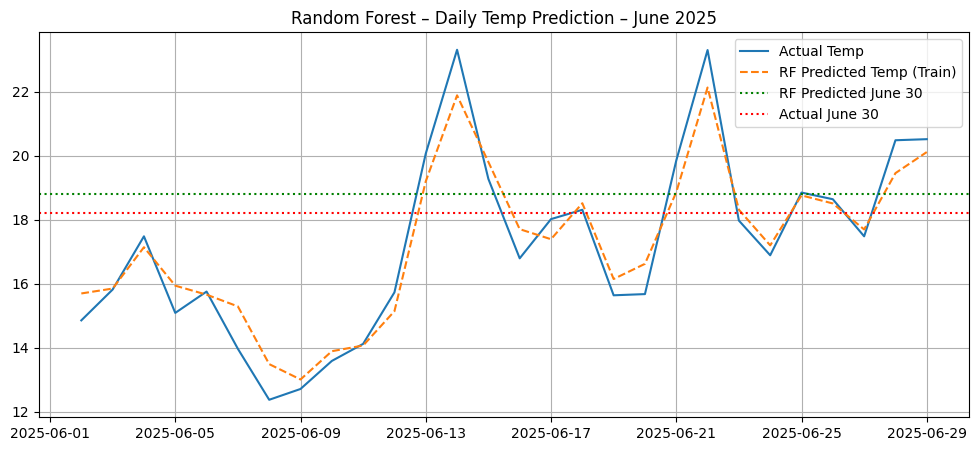

In [7]:
y_train_pred = model.predict(X)

plt.figure(figsize=(12, 5))
plt.plot(df_model.index, y, label="Actual Temp")
plt.plot(df_model.index, y_train_pred, label="RF Predicted Temp (Train)", linestyle="--")
plt.axhline(y=y_pred, color="green", linestyle=":", label="RF Predicted June 30")
plt.axhline(y=y_actual, color="red", linestyle=":", label="Actual June 30")
plt.title("Random Forest – Daily Temp Prediction – June 2025")
plt.legend()
plt.grid(True)
plt.show()


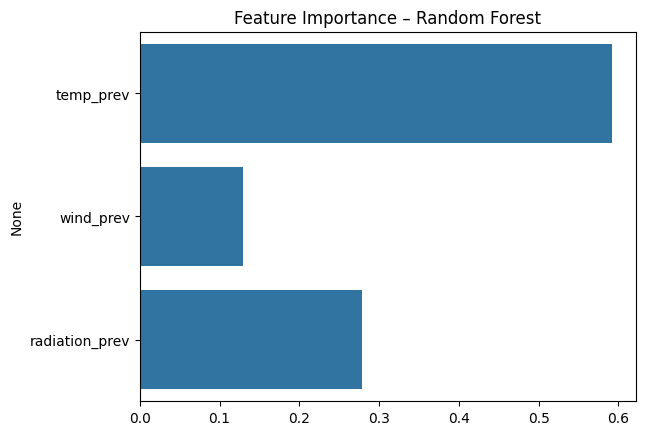

In [8]:
import seaborn as sns

importances = model.feature_importances_
feat_names = X.columns

sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance – Random Forest")
plt.show()